In [1]:
%config InlineBackend.figure_formats=['svg']
%matplotlib inline
from matplotlib.pyplot import savefig
import pandas as pd
import numpy as np
import os
data_dimo = pd.read_csv("data/20150317/wgEncodeAwgTfbs_with_JASPAR_MA.csv", header=0,
                        index_col=0, names=["ENCODE_data_set", "TF_name", "JASPAR_id"])
data_4bits = pd.read_csv("data/20150317/wgEncodeAwgTfbs_with_JASPAR_MA.csv", header=0,
                         index_col=0, names=["ENCODE_data_set", "TF_name", "JASPAR_id"])

In [2]:
def auc_val(inline):
    return eval(inline.split(' ')[-1])

In [3]:
directory = '20151103_JasparMatchedChipseqScaledDnashape2ndOrderDimo/'
for repo in os.listdir(directory):
    if repo.startswith('wgEncodeAwgTfbs'):
        res_file = '{0}/{1}/predictions_results.txt'.format(directory, repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC TFFM+DNAshape')
                data_dimo.loc[repo, 'TFFM_dimo_dnashape_AUROC'] = auc_val(first_line)
                second_line = stream.readline()
                assert second_line.startswith('PR AUC TFFM+DNAshape')
                data_dimo.loc[repo, 'TFFM_dimo_dnashape_AUPRC'] = auc_val(second_line)
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC TFFM')
                data_dimo.loc[repo, 'TFFM_dimo_AUROC'] = auc_val(third_line)
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC TFFM')
                data_dimo.loc[repo, 'TFFM_dimo_AUPRC'] = auc_val(fourth_line)
                fifth_line = stream.readline()
                assert fifth_line.startswith('ROC AUC PWM+DNAshape')
                data_dimo.loc[repo, 'PSSM_dimo_dnashape_AUROC'] = auc_val(fifth_line)
                sixth_line = stream.readline()
                assert sixth_line.startswith('PR AUC PWM+DNAshape')
                data_dimo.loc[repo, 'PSSM_dimo_dnashape_AUPRC'] = auc_val(sixth_line)
                seventh_line = stream.readline()
                assert seventh_line.startswith('ROC AUC PWM')
                data_dimo.loc[repo, 'PSSM_dimo_AUROC'] = auc_val(seventh_line)
                eighth_line = stream.readline()
                assert eighth_line.startswith('PR AUC PWM')
                data_dimo.loc[repo, 'PSSM_dimo_AUPRC'] = auc_val(eighth_line)
                data_dimo.loc[repo, 'TFFM_dimo_AUROC_improvement'] = (
                    data_dimo.loc[repo, 'TFFM_dimo_dnashape_AUROC'] -
                    data_dimo.loc[repo, 'TFFM_dimo_AUROC'])
                data_dimo.loc[repo, 'TFFM_dimo_AUPRC_improvement'] = (
                    data_dimo.loc[repo, 'TFFM_dimo_dnashape_AUPRC'] -
                    data_dimo.loc[repo, 'TFFM_dimo_AUPRC'])
                data_dimo.loc[repo, 'PSSM_dimo_AUROC_improvement'] = (
                    data_dimo.loc[repo, 'PSSM_dimo_dnashape_AUROC'] -
                    data_dimo.loc[repo, 'PSSM_dimo_AUROC'])
                data_dimo.loc[repo, 'PSSM_dimo_AUPRC_improvement'] = (
                    data_dimo.loc[repo, 'PSSM_dimo_dnashape_AUPRC'] -
                    data_dimo.loc[repo, 'PSSM_dimo_AUPRC'])

In [4]:
directory = '20160416_JasparMatchedChipseq1merScaledDnashape2ndorderDimoGradboost'
for repo in os.listdir(directory):
    if repo.startswith('wgEncodeAwgTfbs'):
        res_file = '{0}/{1}/predictions_results.txt'.format(directory, repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC 1mer+DNAshape')
                data_4bits.loc[repo, '4bits_dnashape_AUROC'] = auc_val(first_line)
                second_line = stream.readline()
                assert second_line.startswith('PR AUC 1mer+DNAshape')
                data_4bits.loc[repo, '4bits_dnashape_AUPRC'] = auc_val(second_line)
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC 1mer')
                data_4bits.loc[repo, '4bits_AUROC'] = auc_val(third_line)
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC 1mer')
                data_4bits.loc[repo, '4bits_AUPRC'] = auc_val(fourth_line)
                data_4bits.loc[repo, '4bits_AUROC_improvement'] = (
                    data_4bits.loc[repo, '4bits_dnashape_AUROC'] -
                    data_4bits.loc[repo, '4bits_AUROC'])
                data_4bits.loc[repo, '4bits_AUPRC_improvement'] = (
                    data_4bits.loc[repo, '4bits_dnashape_AUPRC']
                    - data_4bits.loc[repo, '4bits_AUPRC'])

In [5]:
combined = pd.concat([data_dimo, data_4bits], axis=1)

4-bits + DNA shape classifier > PSSM + DNA shape for 32 data sets over 400
4-bits + DNA shape classifier > PSSM + DNA shape for 56 data sets over 400


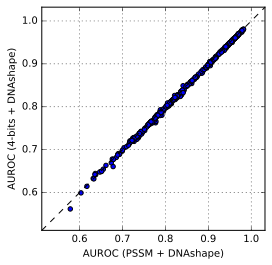

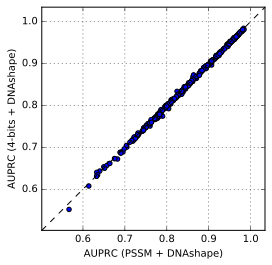

In [6]:
mini = min(min(combined.dropna()["PSSM_dimo_dnashape_AUROC"]),
           min(combined.dropna()["4bits_dnashape_AUROC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_dnashape_AUROC"]),
           max(combined.dropna()["4bits_dnashape_AUROC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_dnashape_AUROC',
                              y='4bits_dnashape_AUROC', kind="scatter")
axes.set_xlabel("AUROC (PSSM + DNAshape)")
axes.set_ylabel("AUROC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_PSSM+DNAshape_4bits+DNAshape.svg')
print '4-bits + DNA shape classifier > PSSM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUROC'] > combined['PSSM_dimo_dnashape_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["PSSM_dimo_dnashape_AUPRC"]),
           min(combined.dropna()["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_dnashape_AUPRC"]),
           max(combined.dropna()["4bits_dnashape_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_dnashape_AUPRC',
                              y='4bits_dnashape_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (PSSM + DNAshape)")
axes.set_ylabel("AUPRC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_PSSM+DNAshape_4bits+DNAshape.svg')
print '4-bits + DNA shape classifier > PSSM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUPRC'] > combined['PSSM_dimo_dnashape_AUPRC']]),
    len(combined))

In [7]:
from scipy.stats import wilcoxon
wilcoxon(combined['PSSM_dimo_dnashape_AUPRC'], combined['4bits_dnashape_AUPRC'])

WilcoxonResult(statistic=8354.5, pvalue=7.6552601177714747e-43)

4-bits + DNA shape classifier > TFFM + DNA shape for 329 data sets over 400
4-bits + DNA shape classifier > TFFM + DNA shape for 332 data sets over 400


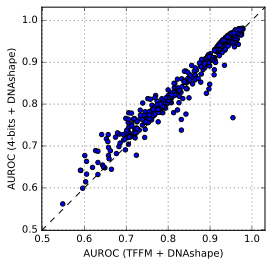

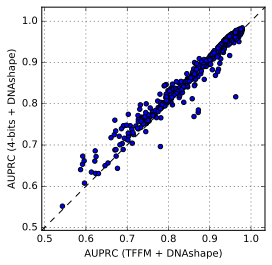

In [8]:
mini = min(min(combined.dropna()["TFFM_dimo_dnashape_AUROC"]),
           min(combined.dropna()["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_dnashape_AUROC"]),
           max(combined.dropna()["4bits_dnashape_AUROC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_dnashape_AUROC',
                              y='4bits_dnashape_AUROC', kind="scatter")
axes.set_xlabel("AUROC (TFFM + DNAshape)")
axes.set_ylabel("AUROC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_TFFM+DNAshape_4bits+DNAshape.svg')
print '4-bits + DNA shape classifier > TFFM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUROC'] > combined['TFFM_dimo_dnashape_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["TFFM_dimo_dnashape_AUPRC"]),
           min(combined.dropna()["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_dnashape_AUPRC"]),
           max(combined.dropna()["4bits_dnashape_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_dnashape_AUPRC',
                              y='4bits_dnashape_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (TFFM + DNAshape)")
axes.set_ylabel("AUPRC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_TFFM+DNAshape_4bits+DNAshape.svg')
print '4-bits + DNA shape classifier > TFFM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUPRC'] > combined['TFFM_dimo_dnashape_AUPRC']]),
    len(combined))

4-bits classifier > PSSM for 400 data sets over 400
4-bits classifier > PSSM for 400 data sets over 400


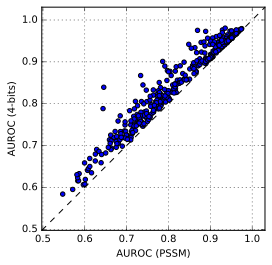

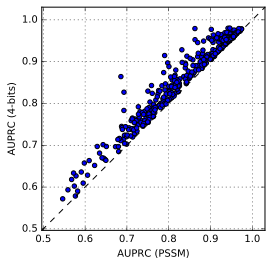

In [9]:
mini = min(min(combined.dropna()["PSSM_dimo_AUROC"]),
           min(combined.dropna()["4bits_AUROC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_AUROC"]),
           max(combined.dropna()["4bits_AUROC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_AUROC',
                              y='4bits_AUROC', kind="scatter")
axes.set_xlabel("AUROC (PSSM)")
axes.set_ylabel("AUROC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_PSSM_4bits.svg')
print '4-bits classifier > PSSM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUROC'] > combined['PSSM_dimo_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["PSSM_dimo_AUPRC"]),
           min(combined.dropna()["4bits_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_AUPRC"]),
           max(combined.dropna()["4bits_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_AUPRC',
                              y='4bits_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (PSSM)")
axes.set_ylabel("AUPRC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_PSSM_4bits.svg')
print '4-bits classifier > PSSM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUPRC'] > combined['PSSM_dimo_AUPRC']]),
    len(combined))

4-bits classifier > TFFM for 372 data sets over 400
4-bits classifier > TFFM for 372 data sets over 400


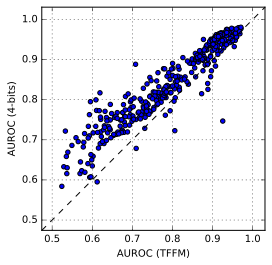

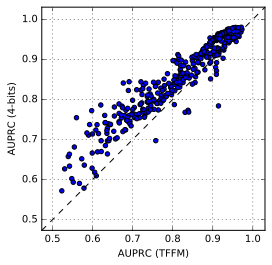

In [10]:
mini = min(min(combined.dropna()["TFFM_dimo_AUROC"]),
           min(combined.dropna()["4bits_AUROC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_AUROC"]),
           max(combined.dropna()["4bits_AUROC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_AUROC',
                              y='4bits_AUROC', kind="scatter")
axes.set_xlabel("AUROC (TFFM)")
axes.set_ylabel("AUROC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_TFFM_4bits.svg')
print '4-bits classifier > TFFM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUROC'] > combined['TFFM_dimo_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["TFFM_dimo_AUPRC"]),
           min(combined.dropna()["4bits_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_AUPRC"]),
           max(combined.dropna()["4bits_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_AUPRC',
                              y='4bits_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (TFFM)")
axes.set_ylabel("AUPRC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_TFFM_4bits.svg')
print '4-bits classifier > TFFM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUPRC'] > combined['TFFM_dimo_AUPRC']]),
    len(combined))

## Using median values

In [11]:
tf_dico = {'TF_name': [], '4bits_dnashape_AUROC': [], '4bits_AUROC': [],
          '4bits_dnashape_AUPRC': [], '4bits_AUPRC': [],
          'TFFM_dimo_dnashape_AUROC': [], 'TFFM_dimo_AUROC': [],
          'TFFM_dimo_dnashape_AUPRC': [], 'TFFM_dimo_AUPRC': [],
          'PSSM_dimo_dnashape_AUROC': [], 'PSSM_dimo_AUROC': [],
          'PSSM_dimo_dnashape_AUPRC': [], 'PSSM_dimo_AUPRC': [],}
for tf in list(set(data_dimo.TF_name)):
    tf_dico['TF_name'].append(tf)
    tf_dico['4bits_dnashape_AUROC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['4bits_dnashape_AUROC'].median())
    tf_dico['4bits_AUROC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['4bits_AUROC'].median())
    tf_dico['4bits_dnashape_AUPRC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['4bits_dnashape_AUPRC'].median())
    tf_dico['4bits_AUPRC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['4bits_AUPRC'].median())
    tf_dico['TFFM_dimo_dnashape_AUROC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['TFFM_dimo_dnashape_AUROC'].median())
    tf_dico['TFFM_dimo_AUROC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['TFFM_dimo_AUROC'].median())
    tf_dico['TFFM_dimo_dnashape_AUPRC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['TFFM_dimo_dnashape_AUPRC'].median())
    tf_dico['TFFM_dimo_AUPRC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['TFFM_dimo_AUPRC'].median())
    tf_dico['PSSM_dimo_dnashape_AUROC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['PSSM_dimo_dnashape_AUROC'].median())
    tf_dico['PSSM_dimo_AUROC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['PSSM_dimo_AUROC'].median())
    tf_dico['PSSM_dimo_dnashape_AUPRC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['PSSM_dimo_dnashape_AUPRC'].median())
    tf_dico['PSSM_dimo_AUPRC'].append(
        combined.dropna().loc[data_dimo.TF_name == tf]['PSSM_dimo_AUPRC'].median())
combined = pd.DataFrame(tf_dico)

4-bits + DNA shape classifier > PSSM + DNA shape for 10 data sets over 76
4-bits + DNA shape classifier > PSSM + DNA shape for 12 data sets over 76


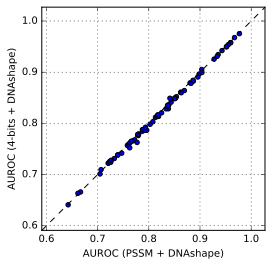

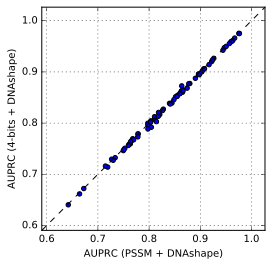

In [12]:
mini = min(min(combined.dropna()["PSSM_dimo_dnashape_AUROC"]),
           min(combined.dropna()["4bits_dnashape_AUROC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_dnashape_AUROC"]),
           max(combined.dropna()["4bits_dnashape_AUROC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_dnashape_AUROC',
                              y='4bits_dnashape_AUROC', kind="scatter")
axes.set_xlabel("AUROC (PSSM + DNAshape)")
axes.set_ylabel("AUROC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_PSSM+DNAshape_4bits+DNAshape_perTF.svg')
print '4-bits + DNA shape classifier > PSSM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUROC'] > combined['PSSM_dimo_dnashape_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["PSSM_dimo_dnashape_AUPRC"]),
           min(combined.dropna()["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_dnashape_AUPRC"]),
           max(combined.dropna()["4bits_dnashape_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_dnashape_AUPRC',
                              y='4bits_dnashape_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (PSSM + DNAshape)")
axes.set_ylabel("AUPRC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_PSSM+DNAshape_4bits+DNAshape_perTF.svg')
print '4-bits + DNA shape classifier > PSSM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUPRC'] > combined['PSSM_dimo_dnashape_AUPRC']]),
    len(combined))

In [13]:
print 'AUPRC(PSSM + DNA shape) > AUPRC(4-bits + DNA shape)',
print 'for {0:d} TFs over {1:d}'.format(
    len(combined[combined['PSSM_dimo_dnashape_AUPRC']>combined['4bits_dnashape_AUPRC']]),
    len(set(combined.TF_name)))
wilcoxon(combined['PSSM_dimo_dnashape_AUPRC'], combined['4bits_dnashape_AUPRC'])

AUPRC(PSSM + DNA shape) > AUPRC(4-bits + DNA shape) for 64 TFs over 76


WilcoxonResult(statistic=357.0, pvalue=1.0273416911399633e-08)

4-bits + DNA shape classifier > TFFM + DNA shape for 57 data sets over 76
4-bits + DNA shape classifier > TFFM + DNA shape for 60 data sets over 76


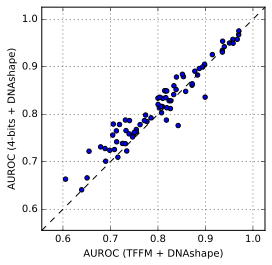

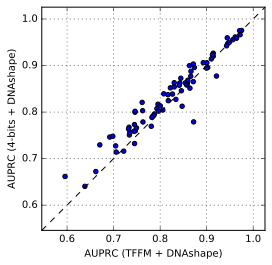

In [14]:
mini = min(min(combined.dropna()["TFFM_dimo_dnashape_AUROC"]),
           min(combined.dropna()["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_dnashape_AUROC"]),
           max(combined.dropna()["4bits_dnashape_AUROC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_dnashape_AUROC',
                              y='4bits_dnashape_AUROC', kind="scatter")
axes.set_xlabel("AUROC (TFFM + DNAshape)")
axes.set_ylabel("AUROC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_TFFM+DNAshape_4bits+DNAshape_perTF.svg')
print '4-bits + DNA shape classifier > TFFM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUROC'] > combined['TFFM_dimo_dnashape_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["TFFM_dimo_dnashape_AUPRC"]),
           min(combined.dropna()["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_dnashape_AUPRC"]),
           max(combined.dropna()["4bits_dnashape_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_dnashape_AUPRC',
                              y='4bits_dnashape_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (TFFM + DNAshape)")
axes.set_ylabel("AUPRC (4-bits + DNAshape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_TFFM+DNAshape_4bits+DNAshape_perTF.svg')
print '4-bits + DNA shape classifier > TFFM + DNA shape',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_dnashape_AUPRC'] > combined['TFFM_dimo_dnashape_AUPRC']]),
    len(combined))

4-bits classifier > PSSM for 76 data sets over 76
4-bits classifier > PSSM for 76 data sets over 76


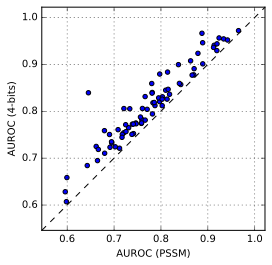

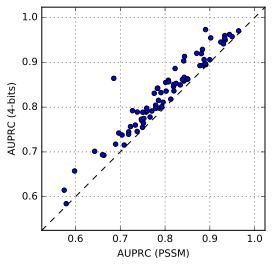

In [15]:
mini = min(min(combined.dropna()["PSSM_dimo_AUROC"]),
           min(combined.dropna()["4bits_AUROC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_AUROC"]),
           max(combined.dropna()["4bits_AUROC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_AUROC',
                              y='4bits_AUROC', kind="scatter")
axes.set_xlabel("AUROC (PSSM)")
axes.set_ylabel("AUROC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_PSSM_4bits_perTF.svg')
print '4-bits classifier > PSSM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUROC'] > combined['PSSM_dimo_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["PSSM_dimo_AUPRC"]),
           min(combined.dropna()["4bits_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["PSSM_dimo_AUPRC"]),
           max(combined.dropna()["4bits_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='PSSM_dimo_AUPRC',
                              y='4bits_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (PSSM)")
axes.set_ylabel("AUPRC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_PSSM_4bits_perTF.svg')
print '4-bits classifier > PSSM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUPRC'] > combined['PSSM_dimo_AUPRC']]),
    len(combined))

4-bits classifier > TFFM for 70 data sets over 76
4-bits classifier > TFFM for 71 data sets over 76


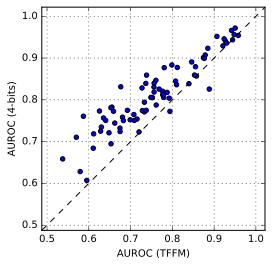

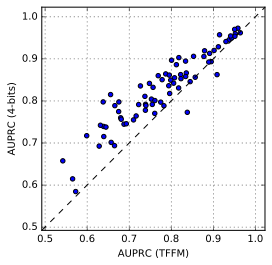

In [16]:
mini = min(min(combined.dropna()["TFFM_dimo_AUROC"]),
           min(combined.dropna()["4bits_AUROC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_AUROC"]),
           max(combined.dropna()["4bits_AUROC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_AUROC',
                              y='4bits_AUROC', kind="scatter")
axes.set_xlabel("AUROC (TFFM)")
axes.set_ylabel("AUROC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUROC_TFFM_4bits_perTF.svg')
print '4-bits classifier > TFFM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUROC'] > combined['TFFM_dimo_AUROC']]),
    len(combined))

mini = min(min(combined.dropna()["TFFM_dimo_AUPRC"]),
           min(combined.dropna()["4bits_AUPRC"])) - 0.05
maxi = max(max(combined.dropna()["TFFM_dimo_AUPRC"]),
           max(combined.dropna()["4bits_AUPRC"])) + 0.05
axes = combined.dropna().plot(x='TFFM_dimo_AUPRC',
                              y='4bits_AUPRC', kind="scatter")
axes.set_xlabel("AUPRC (TFFM)")
axes.set_ylabel("AUPRC (4-bits)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig('ENCODE_AUPRC_TFFM_4bits_perTF.svg')
print '4-bits classifier > TFFM',
print 'for {0:d} data sets over {1:d}'.format(
    len(combined[combined['4bits_AUPRC'] > combined['TFFM_dimo_AUPRC']]),
    len(combined))